# Steps to explain ML models with SHAP

## Load data

In [2]:
import pandas as pd

path = '../../../data/heart_disease/output/filled_missing.csv'
df = pd.read_csv(path, index_col=0)[['age', 'trestbps', 'chol', 'fbs', 'thalch', 'exang', 'disease']]
df

,age,trestbps,chol,fbs,thalch,exang,disease
0,63,145,233,1,150,0,No
1,67,160,286,0,108,1,Moderate
2,67,120,229,0,129,1,Mild
3,37,130,250,0,187,0,No
4,41,130,204,0,172,0,No
...,...,...,...,...,...,...,...
915,54,127,333,1,154,0,Mild
916,62,135,139,0,128,0,No
917,55,122,223,1,100,0,Moderate
918,58,139,385,1,124,1,No


## Feature selection

In [3]:
target = 'disease'

y = df[target]
X = df.drop(columns=target)

## Modelling

In [4]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X,y)

DecisionTreeClassifier()

In [5]:
model.score(X,y)

1.0

In [6]:
y_pred = model.predict(X)
y_pred

array(['No', 'Moderate', 'Mild', 'No', 'No', 'No', 'Severe', 'No',
       'Moderate', 'Mild', 'No', 'No', 'Moderate', 'No', 'No', 'No',
       'Mild', 'No', 'No', 'No', 'No', 'No', 'Mild', 'Severe', 'Critical',
       'No', 'No', 'No', 'No', 'Severe', 'No', 'Moderate', 'Mild', 'No',
       'No', 'No', 'Severe', 'Mild', 'Severe', 'No', 'Critical', 'No',
       'No', 'No', 'Mild', 'Critical', 'No', 'Critical', 'No', 'No', 'No',
       'No', 'Moderate', 'No', 'Mild', 'Mild', 'Mild', 'Mild', 'No', 'No',
       'Moderate', 'No', 'Mild', 'No', 'Moderate', 'Moderate', 'Mild',
       'No', 'Moderate', 'Mild', 'No', 'Severe', 'Mild', 'Mild', 'Mild',
       'No', 'Mild', 'No', 'No', 'Severe', 'No', 'No', 'No', 'Severe',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Severe', 'No', 'No',
       'No', 'Mild', 'Moderate', 'Severe', 'No', 'No', 'No', 'No', 'No',
       'No', 'Severe', 'No', 'Moderate', 'Mild', 'Moderate', 'Severe',
       'Mild', 'Mild', 'No', 'Moderate', 'Moderate', 'No', 'No', 

## SHAP

### Explainer

In [7]:
pip install shap

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.1.2 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [8]:
import shap
explainer = shap.TreeExplainer(model)

/home/vscode/.local/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### SHAP values

In [9]:
shap_values = explainer.shap_values(X)
shap_values

array([[[ 1.98350740e-02, -1.25073876e-01,  4.46392482e-02,
         -6.89987244e-02,  1.29598278e-01],
        [ 1.05709207e-02, -4.17477689e-02,  9.33258792e-03,
          4.59208131e-03,  1.72521790e-02],
        [-2.79680276e-02, -9.57982612e-02, -1.06087406e-01,
          2.04431305e-01,  2.54223900e-02],
        [-2.35935977e-02,  1.38032443e-02,  2.79152807e-02,
         -5.46712020e-02,  3.65462746e-02],
        [-3.84207917e-03,  1.08708649e-02, -6.73194065e-02,
          2.17200913e-01, -1.56910293e-01],
        [-5.43707291e-03, -5.00976813e-02, -2.69585652e-02,
          2.50706497e-01, -1.68213177e-01]],

       [[ 7.46769917e-03, -2.99278025e-01,  2.90990972e-01,
         -5.84340956e-02,  5.92534500e-02],
        [ 6.99546109e-03,  2.10423088e-02,  6.61155746e-02,
         -3.08565127e-02, -6.32968318e-02],
        [-3.32024518e-02,  3.70690267e-02,  6.28818377e-02,
          1.42730360e-02, -8.10214485e-02],
        [ 4.13535457e-03,  7.35303180e-03,  7.03970382e-02,
  

In [57]:
dfs = {}
dfs

{}

In [58]:
model.classes_

array(['Critical', 'Mild', 'Moderate', 'No', 'Severe'], dtype=object)

In [59]:
for i, x in enumerate(model.classes_):
    s = shap_values[:,:,i]
    d = pd.DataFrame(s, index=df.index, columns=df.columns[:-1])
    dfs[x] = d

In [61]:
dfs['Critical']

,age,trestbps,chol,fbs,thalch,exang
0,0.019835,0.010571,-0.027968,-0.023594,-0.003842,-0.005437
1,0.007468,0.006995,-0.033202,0.004135,-0.008871,-0.006960
2,-0.016766,-0.022336,-0.007149,0.001875,0.008732,0.005208
3,-0.007239,-0.005973,-0.024281,0.002771,0.039245,-0.034958
4,-0.009971,-0.009087,-0.001342,0.000329,-0.006537,-0.003826
...,...,...,...,...,...,...
915,-0.002533,-0.000027,-0.008146,0.003382,-0.016181,-0.006929
916,0.045003,-0.018040,0.027684,0.000803,0.043472,-0.129358
917,0.000088,-0.133832,0.030696,0.037847,0.027184,0.007582
918,0.024025,0.001231,-0.078486,0.002116,0.002585,0.018095


In [62]:
dfs['Severe']

,age,trestbps,chol,fbs,thalch,exang
0,0.129598,0.017252,0.025422,0.036546,-0.156910,-0.168213
1,0.059253,-0.063297,-0.081021,-0.009349,0.051876,-0.073767
2,0.065363,-0.226618,0.093510,-0.003029,-0.117273,0.071743
3,-0.022193,-0.006865,-0.020888,-0.005391,-0.037977,-0.022990
4,-0.037923,-0.009108,-0.020011,-0.005118,-0.019718,-0.024426
...,...,...,...,...,...,...
915,-0.030930,0.002443,-0.012856,-0.005950,-0.042232,-0.026781
916,0.055355,-0.125394,0.015183,-0.006848,-0.044160,-0.010439
917,-0.053442,-0.009467,-0.027302,-0.003847,0.009169,-0.031415
918,-0.020546,-0.010036,-0.052166,0.002078,-0.063252,0.027618


In [50]:
pd.DataFrame(shap_values)

ValueError: Must pass 2-d input. shape=(920, 6, 5)

### Plots

#### Summary: Bar

In [43]:
s = shap_values [:,:,1]


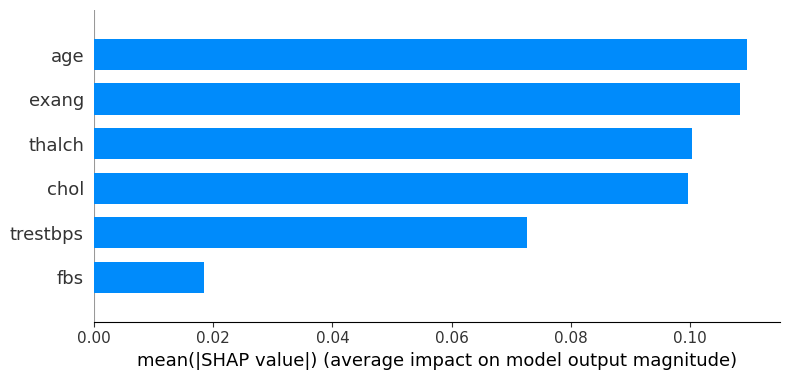

In [44]:
shap.summary_plot(s, X, plot_type='bar')

#### Summary: Dot

In [45]:
model.classes_

array(['Critical', 'Mild', 'Moderate', 'No', 'Severe'], dtype=object)

No - Mild - Moderate - Severe - Critical

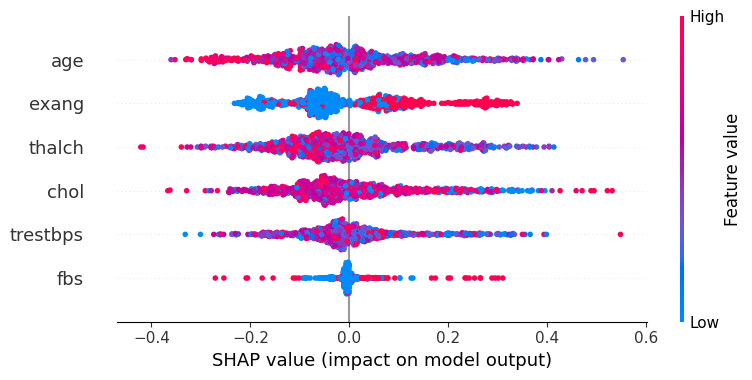

In [46]:
shap.summary_plot(s, X, plot_type='dot')

#### Force

In [47]:
expected_value = explainer.expected_value
expected_value

array([0.03043478, 0.28804348, 0.11847826, 0.44673913, 0.11630435])

In [48]:
shap.initjs() # Required for Jupyter Notebook; only once
shap.plots.force(explainer.expected_value, shap_values, X)

TypeError: In v0.20, force plot now requires the base value as the first parameter! Try shap.plots.force(explainer.expected_value, shap_values) or for multi-output models try shap.plots.force(explainer.expected_value[0], shap_values[..., 0]).

#### Decision

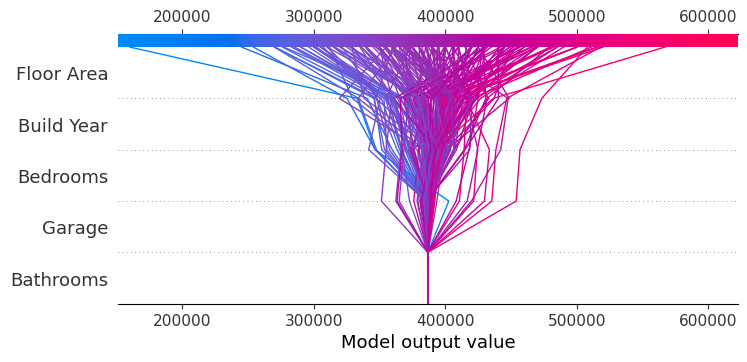

In [11]:
shap.decision_plot(expected_value, shap_values, X)

#### Force Individual

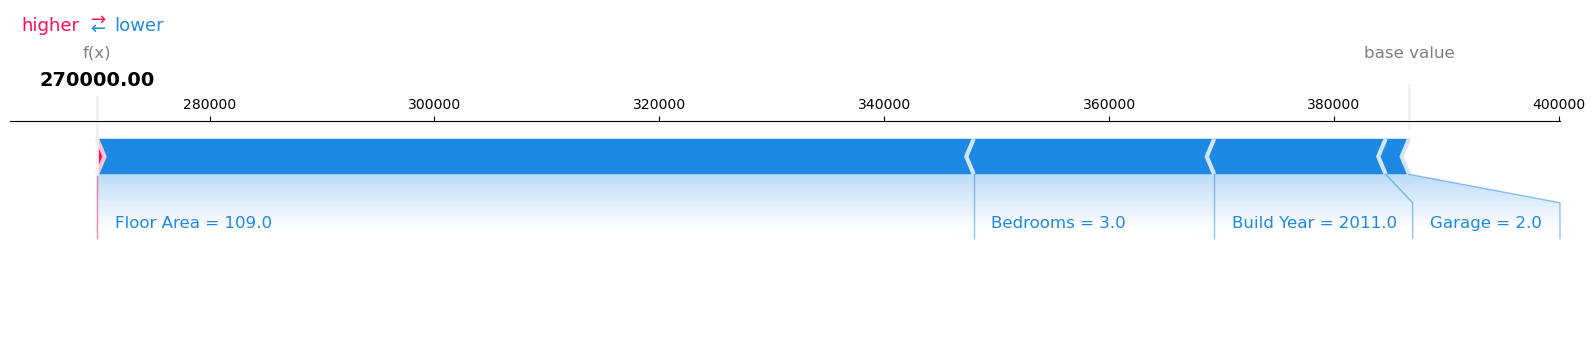

In [12]:
row = 0
shap.force_plot(expected_value, shap_values[row], X.iloc[row], matplotlib=True)

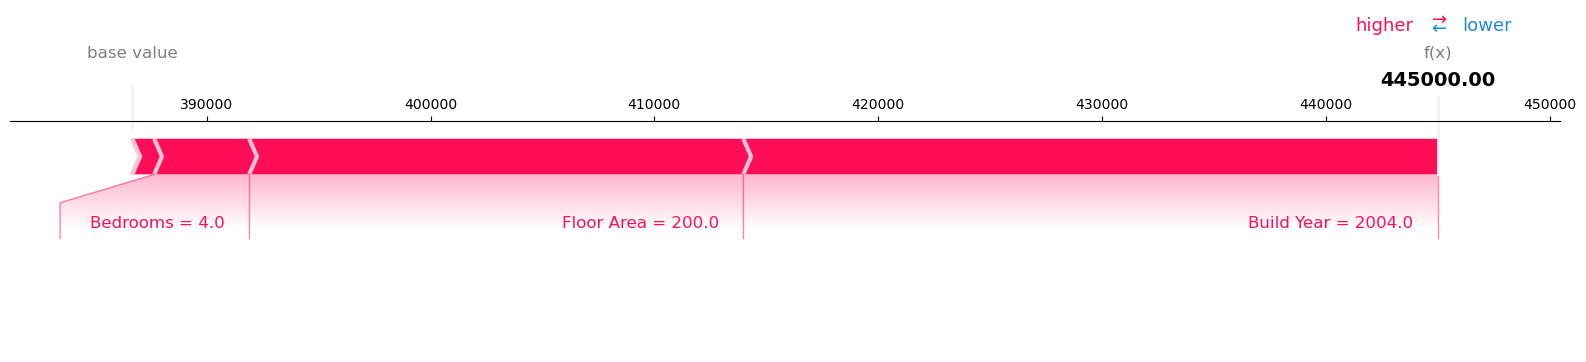

In [13]:
row = 2
shap.force_plot(expected_value, shap_values[row], X.iloc[row], matplotlib=True)

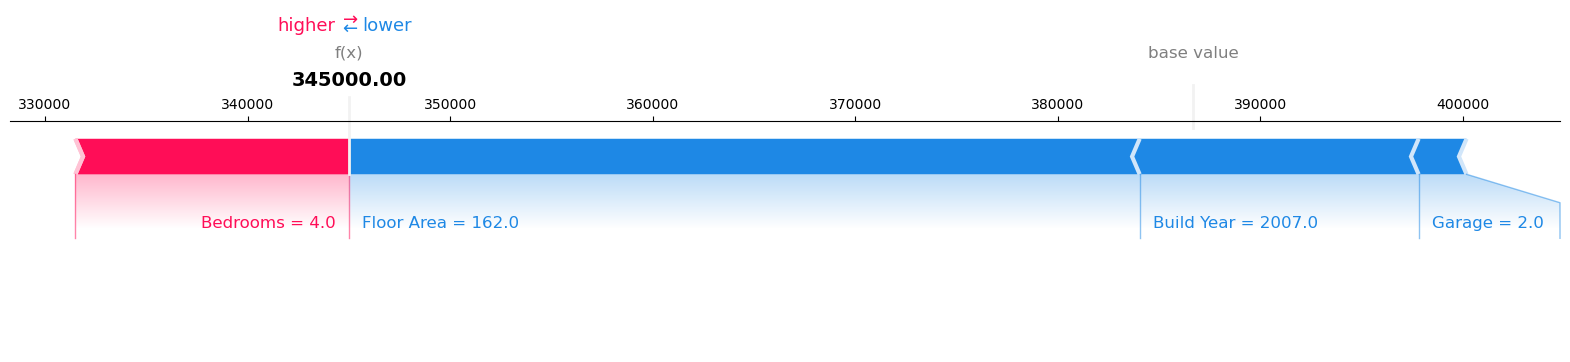

In [14]:
row = 14
shap.force_plot(expected_value, shap_values[row], X.iloc[row], matplotlib=True)